## Linear Regression(1 Feature)

입력 데이터 100개

target weights = 5
target bias = -3

learning rate = 0.01

/var/folders/g2/t0zgyy0d1tl_58849t9hfg5c0000gn/T/ipykernel_14411/4142363024.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('rainbow', lut = N)


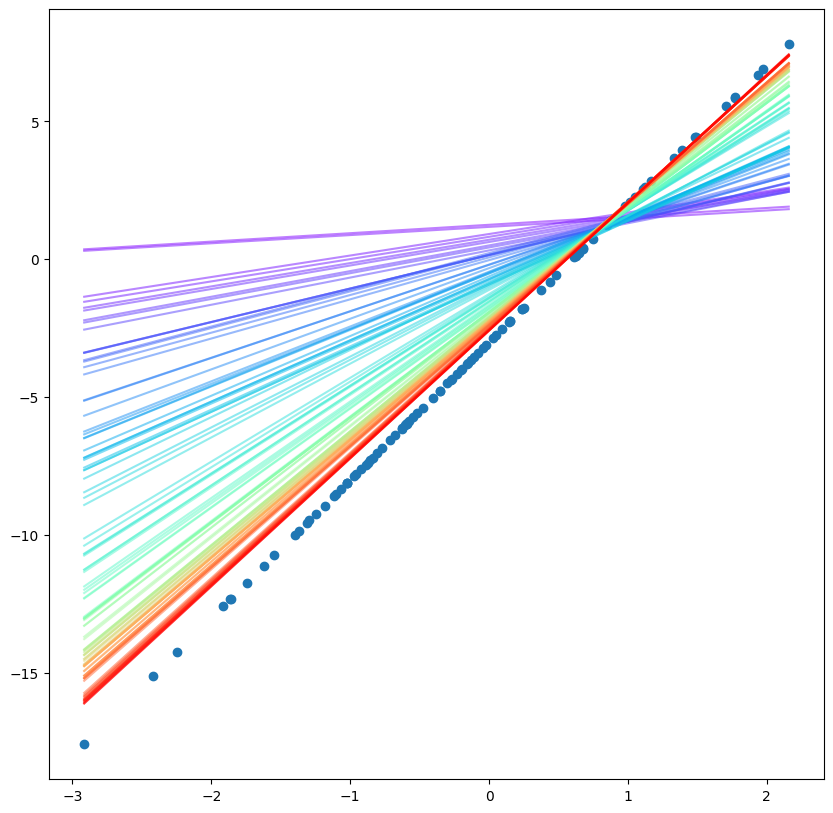

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

np.random.seed(3)

# set param 
N = 100 
lr = 0.01
t_w, t_b = 5, -3 
w, b = np.random.uniform(-3, 3, 2)


# generate dataset 
x_data = np.random.randn(N, )
y_data = x_data * t_w + t_b


# visualize dataset 
cmap = cm.get_cmap('rainbow', lut = N)
fig, ax = plt.subplots(figsize = (10, 10))
ax.scatter(x_data, y_data)

x_range = np.array([x_data.min(), x_data.max()])
J_track = list()
w_track, b_track = list(), list()


# train model and visualize updated models
for data_idx, (x, y) in enumerate(zip(x_data, y_data)):
    w_track.append(w)
    b_track.append(b)
    
    # visualize updated model     
    y_range = x_range * w + b
    ax.plot(x_range, y_range, color = cmap(data_idx), alpha = 0.5)

    # forward propagation 
    pred = x * w + b
    J = (y - pred)**2
    
    # jacobians 
    dJ_dpred = -2 * (y - pred)
    dpred_dw = x
    dpred_db = 1
    
    # backpropagation 
    dJ_dw = dJ_dpred * dpred_dw
    dJ_db = dJ_dpred * dpred_db

    # parameter update 
    w = w - lr * dJ_dw
    b = b - lr * dJ_db


# visualize result





0.36020676276355756
2.1059120797014006


## Linear Regression(N feature)

In [23]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.cm as cm 

np.random.seed(3)

# set params
N, n_feature = 100 ,3 
lr = 0.03 
t_W = np.random.uniform(-3, 3, (n_feature, 1))
t_b = np.random.uniform(-3, 3, (1, ))

W = np.random.uniform(-3, 3, (n_feature, 1))
b = np.random.uniform(-3, 3, (1, 1))

# generate dataset 
x_data = np.random.randn(N, n_feature)
y_data = x_data @ t_W + t_b

J_track = list()
W_track, b_track = list(), list()

for idx_data, (X, y) in enumerate(zip(x_data, y_data)):
    W_track.append(W)
    b_track.append(b)
    
    # forward propagation
    X = X.reshape(1, -1);    
    pred = X @ W + b
    J = (y - pred)**2
    J_track.append(J.squeeze())
    
    # jacobian 
    dJ_dpred = -2 * (y - pred)
    dpred_dW = X
    dpred_db = 1
    
    # backpropagation 
    dJ_dW = dJ_dpred * dpred_dW
    dJ_db = dJ_dpred * dpred_db
    
    # parameter update
    W = W - lr * dJ_dW.T
    b = b - lr * dJ_db.reshape(-1, 1)
    break


W_track = np.hstack(W_track)
b_track = np.concatenate(b_track).flatten()



[array([[-1.75654273]])]
[-1.75654273]
